True Negatives: 150
False Positives: 3
False Negatives: 21
True Positives: 26
Precision: 0.896551724137931
Recall: 0.5531914893617021


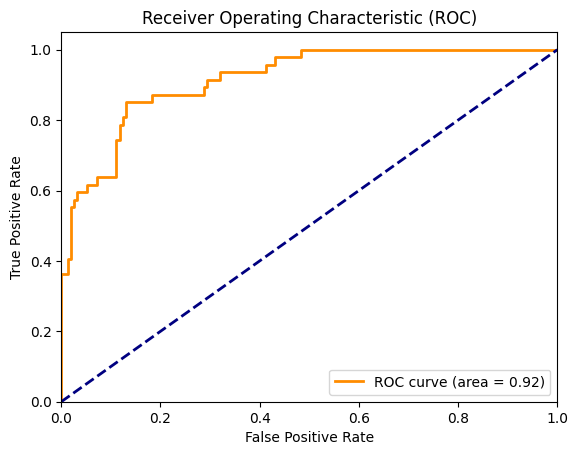

Minimum FPR for TPR >= 0.90: 0.29411764705882354


In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:/Users/X390 Yoga/Desktop/Swayam/ML IoT/HW4/hw4_data.csv')

# Convert the necessary columns to numpy arrays as specified
model_output = df['model_output'].to_numpy()
true_class = df['true_class'].to_numpy()
y_pred = df['prediction'].to_numpy()

# Calculate confusion matrix components
tn, fp, fn, tp = confusion_matrix(true_class, y_pred).ravel()

# Calculate precision and recall
precision = precision_score(true_class, y_pred)
recall = recall_score(true_class, y_pred)

# Print the confusion matrix components, precision, and recall
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(true_class, model_output)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Find the minimum FPR for a TPR of at least 0.90
desired_tpr_index = np.where(tpr >= 0.90)[0][0]  # Index of the first TPR >= 0.90
min_fpr_for_desired_tpr = fpr[desired_tpr_index]  # Corresponding FPR

# Display the minimum FPR for the desired TPR
print(f"Minimum FPR for TPR >= 0.90: {min_fpr_for_desired_tpr}")
